<a href="https://colab.research.google.com/github/luccemhu/Python-introduccion-Qlab/blob/main/S4b_importandodf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER PYTHON - QLAB 2023-2

# <font color=blue>Visualizacion de datos en Python </font>


In [54]:
import pandas as pd
import numpy as np

In [55]:
data = pd.read_excel('https://github.com/luccemhu/Python-introduccion-Qlab/raw/main/S4-Terminos_tiempo.xlsx')
data.head() # 5 primeras filas

,Mes,data science,machine learning,deep learning
0,2004-01-01,12,18,4
1,2004-02-01,12,21,2
2,2004-03-01,9,21,2
3,2004-04-01,10,16,4
4,2004-05-01,7,14,3


In [56]:
data.tail() # 5 últimas filas

,Mes,data science,machine learning,deep learning
189,2019-10-01,90,98,98
190,2019-11-01,87,97,96
191,2019-12-01,81,89,91
192,2020-01-01,94,94,93
193,2020-02-01,100,99,99


In [57]:
data.info() # Info de la data cargada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Mes               194 non-null    datetime64[ns]
 1   data science      194 non-null    int64         
 2   machine learning  194 non-null    int64         
 3   deep learning     194 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 KB


In [58]:
data.describe() # Resumen estadistico del df

,data science,machine learning,deep learning
count,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959
std,23.951006,28.091490,34.476887
min,4.000000,7.000000,1.000000
25%,6.000000,9.000000,2.000000
50%,8.000000,13.000000,3.000000
75%,26.750000,31.500000,34.000000
max,100.000000,100.000000,100.000000


## Resaltando Máximos y Minimos con colores

In [59]:
data.style.highlight_max(color='green').highlight_min(color='red')
# maximos y minimos de cada columna

,Mes,data science,machine learning,deep learning
0,2004-01-01 00:00:00,12,18,4
1,2004-02-01 00:00:00,12,21,2
2,2004-03-01 00:00:00,9,21,2
3,2004-04-01 00:00:00,10,16,4
4,2004-05-01 00:00:00,7,14,3
5,2004-06-01 00:00:00,9,17,3
6,2004-07-01 00:00:00,9,16,3
7,2004-08-01 00:00:00,7,14,3
8,2004-09-01 00:00:00,10,17,4
9,2004-10-01 00:00:00,8,17,4


funcion <b>background_gradient()</b>para pintar las celdas con un color de acuerdo a su valor. Existe varios mapas de colores disponibles en (https://matplotlib.org/gallery/color/colormap_reference.html)

In [60]:
data.style.background_gradient(subset=['data science', 'machine learning'],
                               cmap='BuGn') # Color del degradado

,Mes,data science,machine learning,deep learning
0,2004-01-01 00:00:00,12,18,4
1,2004-02-01 00:00:00,12,21,2
2,2004-03-01 00:00:00,9,21,2
3,2004-04-01 00:00:00,10,16,4
4,2004-05-01 00:00:00,7,14,3
5,2004-06-01 00:00:00,9,17,3
6,2004-07-01 00:00:00,9,16,3
7,2004-08-01 00:00:00,7,14,3
8,2004-09-01 00:00:00,10,17,4
9,2004-10-01 00:00:00,8,17,4


In [61]:
data.style.background_gradient(subset=['data science'], cmap='BuGn').background_gradient(subset=['machine learning'], cmap='Greys')
# Color de degradadi diferente para data sciencce:
# Colo greys para la caolumna machine learning

,Mes,data science,machine learning,deep learning
0,2004-01-01 00:00:00,12,18,4
1,2004-02-01 00:00:00,12,21,2
2,2004-03-01 00:00:00,9,21,2
3,2004-04-01 00:00:00,10,16,4
4,2004-05-01 00:00:00,7,14,3
5,2004-06-01 00:00:00,9,17,3
6,2004-07-01 00:00:00,9,16,3
7,2004-08-01 00:00:00,7,14,3
8,2004-09-01 00:00:00,10,17,4
9,2004-10-01 00:00:00,8,17,4


## Usando barras para mostrar valores de tablas

In [62]:
data.style.bar(color='green', subset=['data science', 'deep learning']) # .bar
# Muestra en verde el nivel de los valores de cada fila

,Mes,data science,machine learning,deep learning
0,2004-01-01 00:00:00,12,18,4
1,2004-02-01 00:00:00,12,21,2
2,2004-03-01 00:00:00,9,21,2
3,2004-04-01 00:00:00,10,16,4
4,2004-05-01 00:00:00,7,14,3
5,2004-06-01 00:00:00,9,17,3
6,2004-07-01 00:00:00,9,16,3
7,2004-08-01 00:00:00,7,14,3
8,2004-09-01 00:00:00,10,17,4
9,2004-10-01 00:00:00,8,17,4


In [63]:
# Más fachero, combinando diferentes estilos:
df_estilizado = data.style.format({'Mes':'{:%m/%Y}'}).background_gradient(subset=['data science'], cmap='BuGn').bar(color='red', subset=['deep learning']).background_gradient(subset=['machine learning'], cmap='plasma')
df_estilizado

,Mes,data science,machine learning,deep learning
0,01/2004,12,18,4
1,02/2004,12,21,2
2,03/2004,9,21,2
3,04/2004,10,16,4
4,05/2004,7,14,3
5,06/2004,9,17,3
6,07/2004,9,16,3
7,08/2004,7,14,3
8,09/2004,10,17,4
9,10/2004,8,17,4


In [64]:
# Para guardar el anterior df estilizado en un excel:
df_estilizado.to_excel('prueba.xlsx')
# Revisar en la parte/pestaña izquierda > archivos
# Desde ahí se puede descargar el archivo creado

<a name='matplotlib'></a>
# <font color=blue>Visualizacion con Matplotlib</font>

<b>`matplotlib.pyplot`</b> provee una colección de funciones al estilo de comandos. Cada función de pyplot realiza algún cambio en una figura
 - Librerias mas usadas, en particular el .pyplot

In [65]:
import matplotlib.pyplot as plt

## Plot de linea

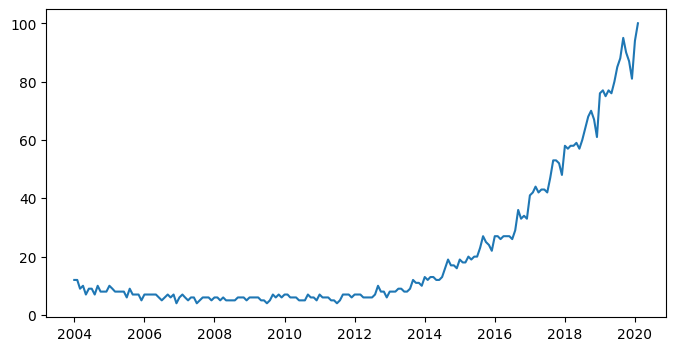

In [66]:
data = pd.read_excel('https://github.com/luccemhu/Python-introduccion-Qlab/raw/main/S4-Terminos_tiempo.xlsx')

# Plot de linea básico:
plt.figure(figsize=(8,4)) # figura de tamaño 8 x 4
plt.plot( data['Mes'], data['data science'] ) # Escogemos dos variables
plt.show()

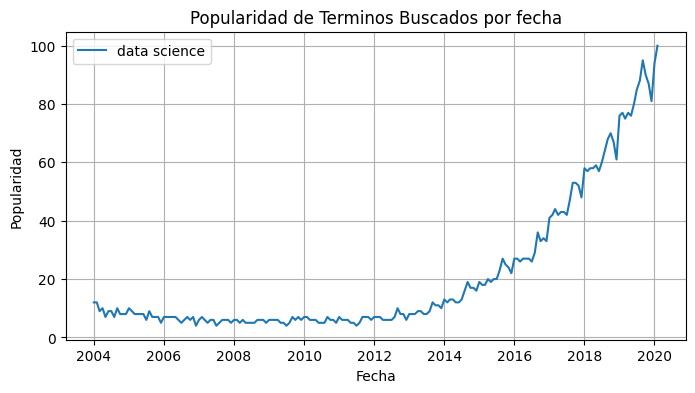

In [67]:
# Plot de linea anterior pero estilizado
plt.figure(figsize=(8,4))
plt.plot(data['Mes'], data['data science'], label='data science')
plt.title('Popularidad de Terminos Buscados por fecha')
plt.xlabel('Fecha')
plt.ylabel('Popularidad')
plt.grid(True)
plt.legend()
plt.show()

### Ploteando multiples variables  


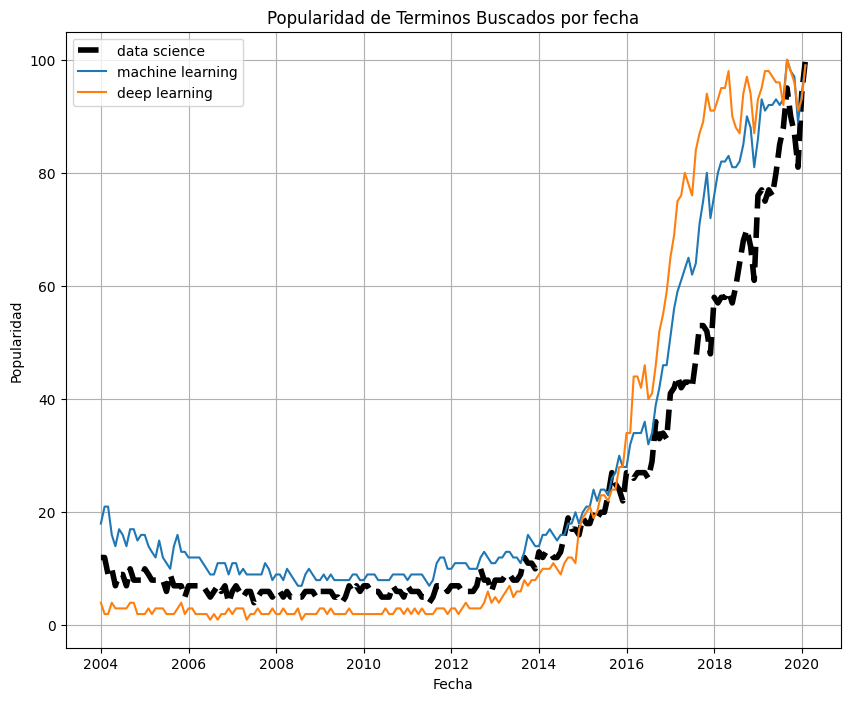

In [68]:
# Con variables columnas
plt.figure(figsize=[10,8])
plt.plot(data['Mes'], data['data science'], label='data science', color='black',linestyle='dashed', linewidth=4)
plt.plot(data['Mes'], data['machine learning'], label='machine learning')
plt.plot(data['Mes'], data['deep learning'], label='deep learning')
plt.title('Popularidad de Terminos Buscados por fecha')
plt.xlabel('Fecha')
plt.ylabel('Popularidad')
plt.grid(True)
plt.legend()
plt.savefig('grafico.pdf')
plt.show()

### Ploteando directamente un Dataframe

Dataframes tienen el metodo `.plot()` que plotea sus columnas con respecto a su indice

In [69]:

data1 = data[['data science', 'machine learning', 'deep learning']] # Subseteamos y escogiendo 3 variables
data1.index = data['Mes'] # mes como index
data1.head()

,data science,machine learning,deep learning
Mes,,,
2004-01-01,12,18,4
2004-02-01,12,21,2
2004-03-01,9,21,2
2004-04-01,10,16,4
2004-05-01,7,14,3


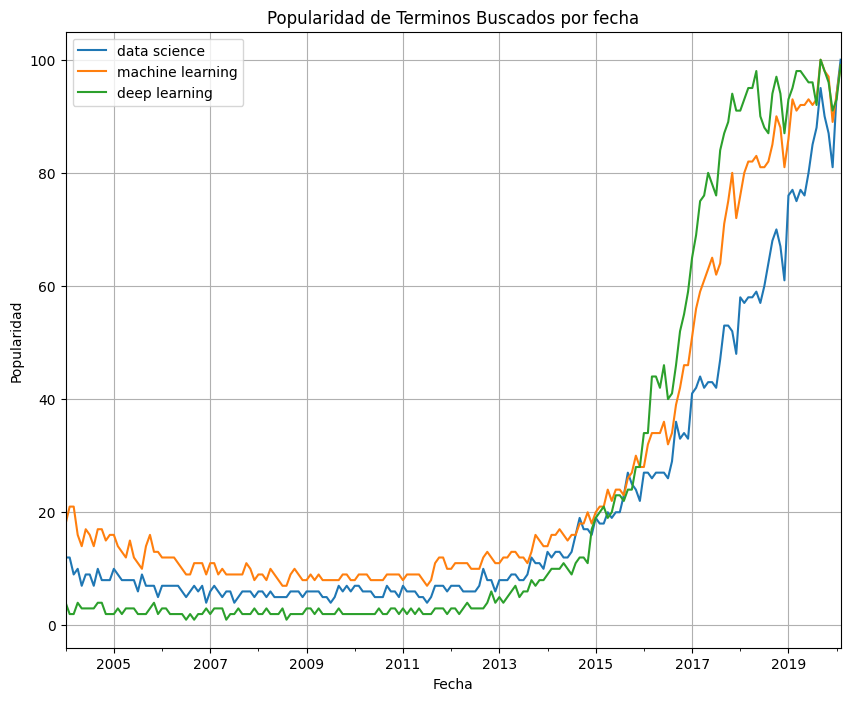

In [70]:
data1.plot(figsize=(10,8))
plt.title('Popularidad de Terminos Buscados por fecha')
plt.xlabel('Fecha')
plt.ylabel('Popularidad')
plt.grid(True)
plt.legend()
plt.show()

## Plots de Area

In [71]:
data = pd.read_excel('https://github.com/luccemhu/Python-introduccion-Qlab/raw/main/S4-ImmigrantsCanada.xlsx',
                     sheet_name='Canada by Citizenship' )
data

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59


In [72]:
data.columns # Muestra las columnas del df

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [73]:
data.columns = list(map(str, data.columns)) # convertir las columnas en strings, cadenas para que la manipulacion de los datos sea factible
data.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [74]:
data.set_index('Country', inplace=True) # Seteando pais como index en el mismo df mediante la funcion inplace
data.head() # 5 primeros registros

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [75]:
data['Total'] = data.sum(axis=1) # Crear una columna con el total de inmigrantes por cada país en los años de la data (tomando en cuenta las columnas)
data.head(3)

<ipython-input-75-8debd650a478>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['Total'] = data.sum(axis=1) # Crear una columna con el total de inmigrantes por cada país en los años de la data (tomando en cuenta las columnas)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [76]:
# Crear una lista strings (str)
years = list(map(str, range(1980, 2014)))
print(years) # Solo paises desde 1980 hasta 2013 (uno menos)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [77]:
# Top 5 países con mayor inmigrantes
data.sort_values(by='Total', ascending=False, # Descendente
                 axis=0, # por cada fila
                 inplace=True) # En el mismo df
data_top5 = data[years].head(5)
data_top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [78]:
# Transponer: Las filas pasen a ser columnas:
data_top5 = data_top5.transpose()
data_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


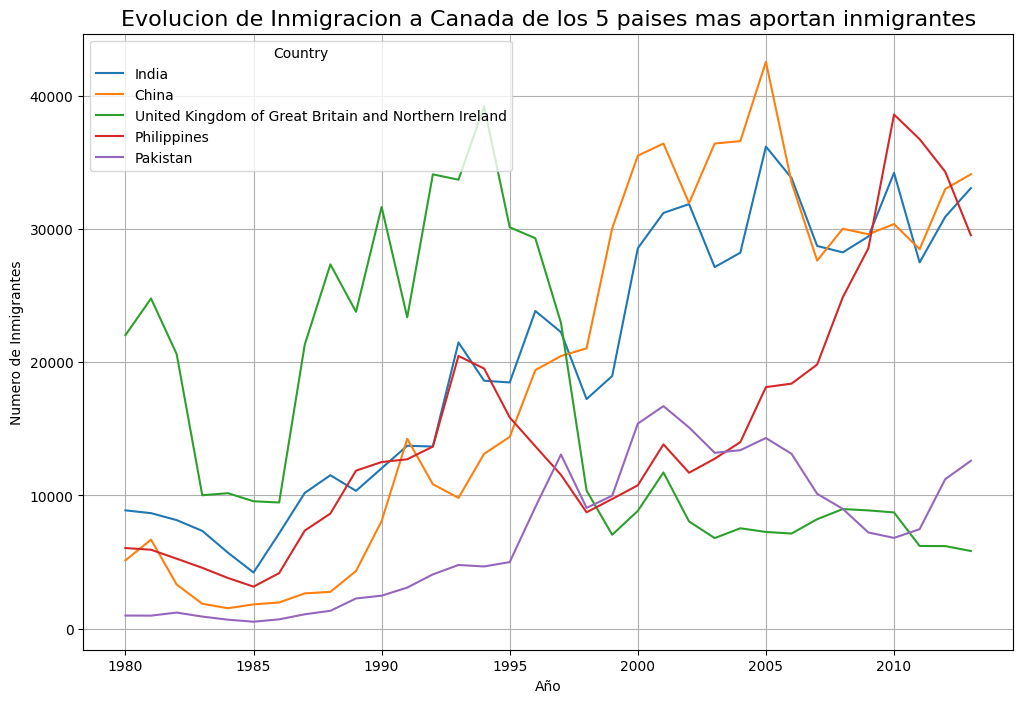

In [79]:

data_top5.plot( figsize= [12,8] ) # Tamaño de la figura
plt.title('Evolucion de Inmigracion a Canada de los 5 paises mas aportan inmigrantes',fontdict={'fontsize':16})
plt.xlabel('Año')
plt.ylabel('Numero de Inmigrantes')
plt.grid(True)
plt.show()

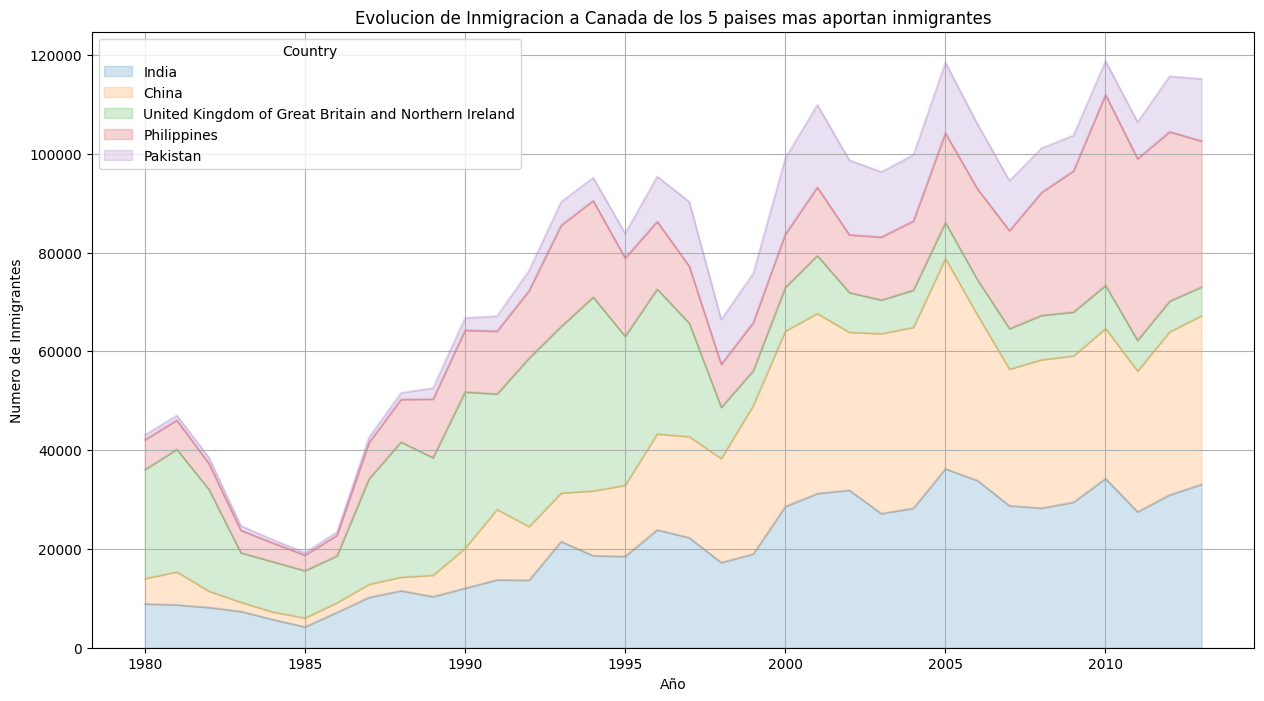

In [80]:
data_top5.plot(kind='area', stacked=True, figsize=(15, 8),
               alpha=0.2) # Transparencia del color
plt.title('Evolucion de Inmigracion a Canada de los 5 paises mas aportan inmigrantes')
plt.ylabel('Numero de Inmigrantes')
plt.xlabel('Año')
plt.grid(True)
plt.show()

## Plot de barras

* <b>kind=bar</b> a la funcion plot  genera un plot de barras verticales.  
* <b>kind=barh</b> a la funcion plot  genera un plot de barras horizontales.

### Barras verticales

In [81]:
data

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2


In [82]:
data_haiti = data.loc['Haiti', years] # Registros de haiti y años (filas)
data_haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

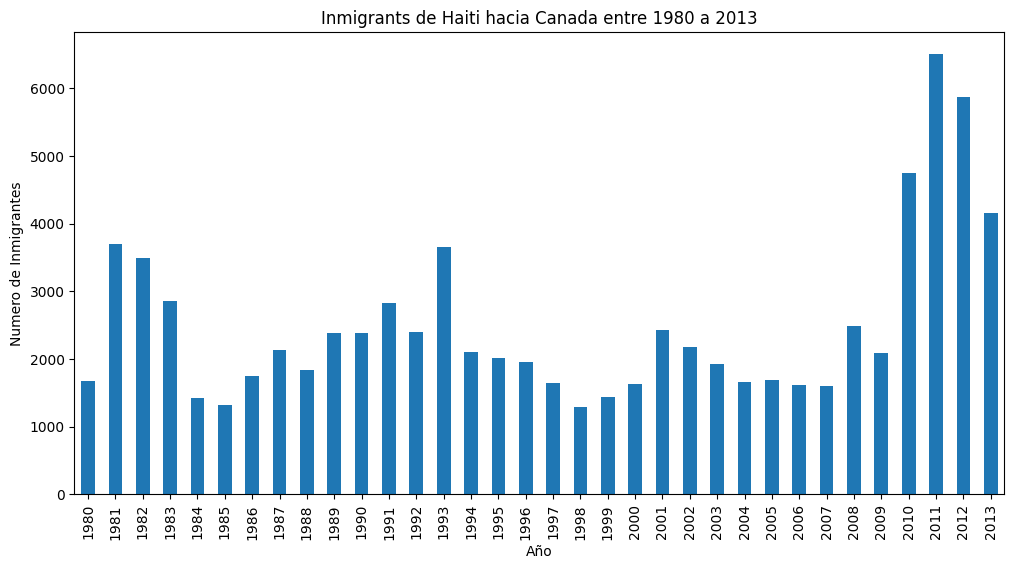

In [83]:
# Barras verticales
data_haiti.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Año')
plt.ylabel('Numero de Inmigrantes')
plt.title('Inmigrants de Haiti hacia Canada entre 1980 a 2013')
plt.show()

In [84]:
# Subseteando la data para haiti y peru:
data_haiti_peru = data.loc[['Haiti', 'Peru'], years]
data_haiti_peru.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Haiti,1666,3692,3498,2860,1418,1321,1753,2132,1829,2377,...,1652,1682,1619,1598,2491,2080,4744,6503,5868,4152
Peru,317,456,401,241,306,328,628,843,1237,1667,...,1460,1653,1473,1490,1094,1884,1283,886,787,682


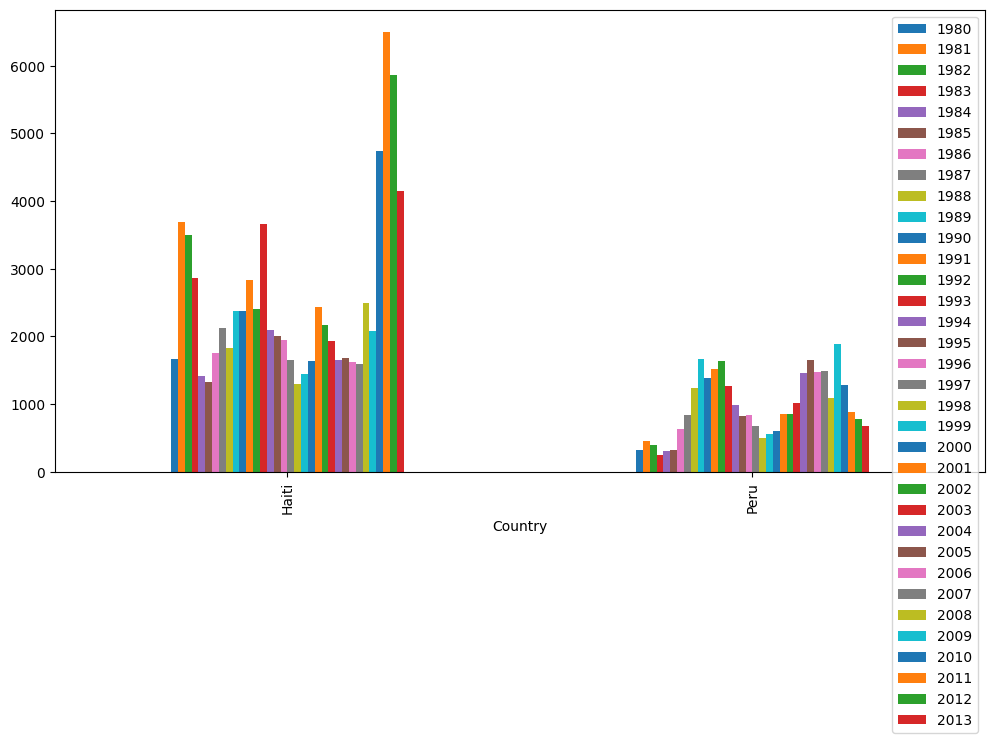

In [85]:
# Con lo anterior, se crea un grafico de barras:
data_haiti_peru.plot(kind='bar', figsize=(12, 6) )
plt.show()

In [86]:

data_haiti_peru = data_haiti_peru.transpose() # Filas por columnas

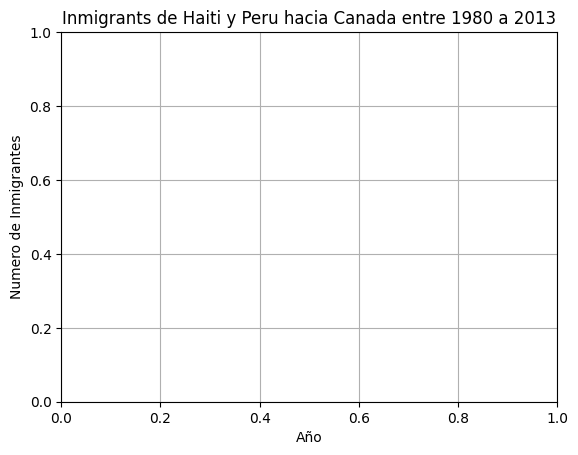

In [87]:
# Con el cambio anteior, el grafico sale mejor
plt.xlabel('Año')
plt.ylabel('Numero de Inmigrantes')
plt.title('Inmigrants de Haiti y Peru hacia Canada entre 1980 a 2013')
plt.grid()
plt.show()

### Barras horizontales

In [88]:
data.sort_values(by='Total', # es la suma de paises
                 ascending=False, # descendente
                 inplace=True)
data_top10 = data['Total'].head(10)
data_top10

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Name: Total, dtype: int64

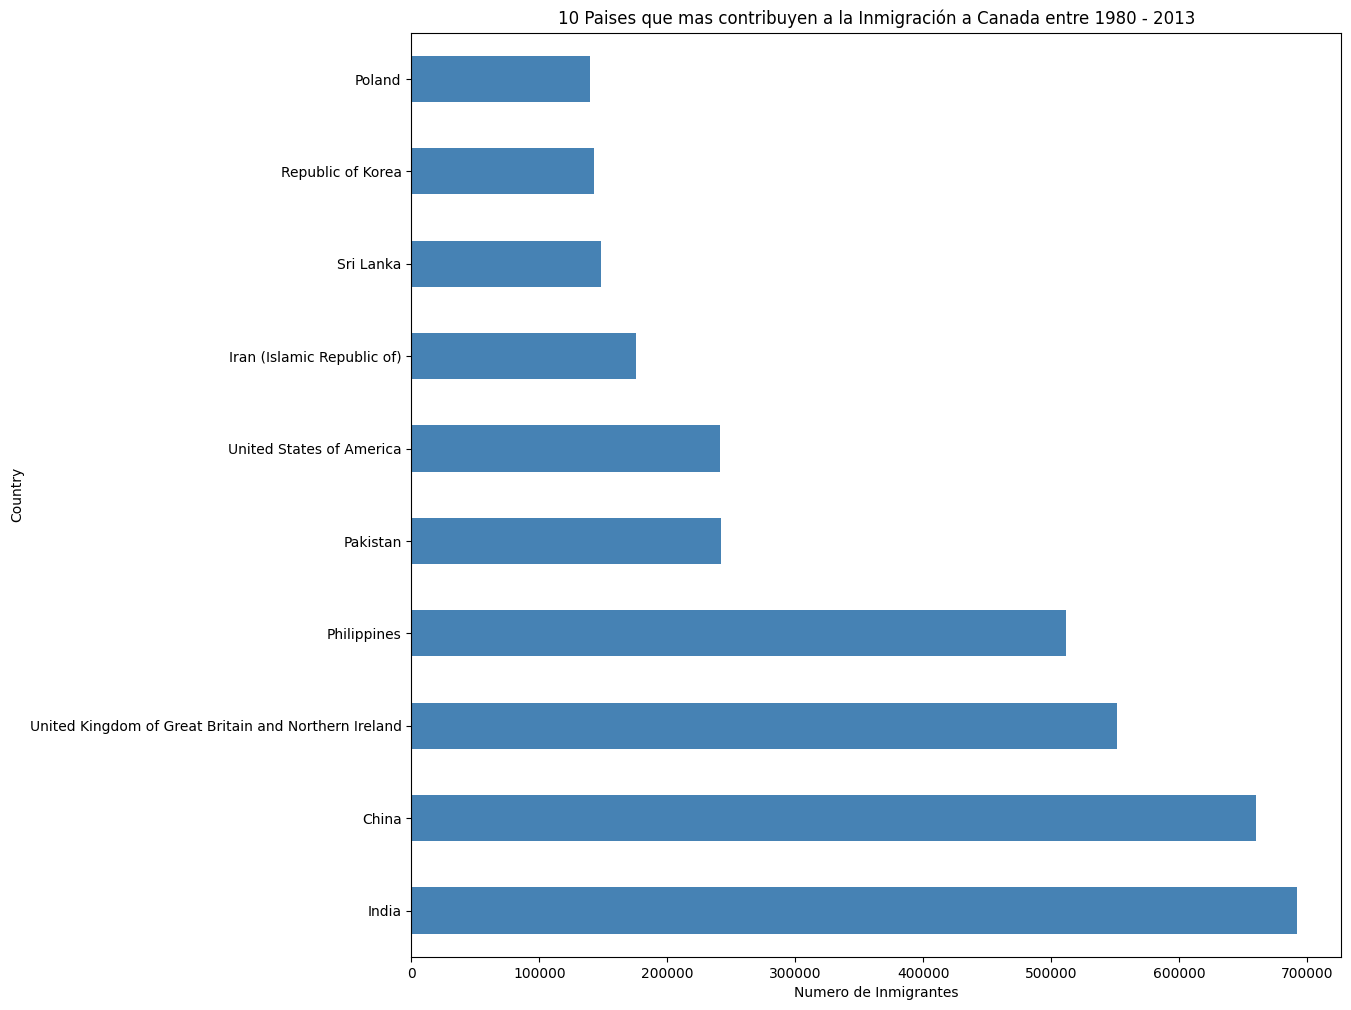

In [89]:
# Ahora indicamos que la grafica sea horizontal
data_top10.plot(kind='barh', figsize=(12, 12), color='steelblue', )
plt.xlabel('Numero de Inmigrantes')
plt.title('10 Paises que mas contribuyen a la Inmigración a Canada entre 1980 - 2013')
plt.show()

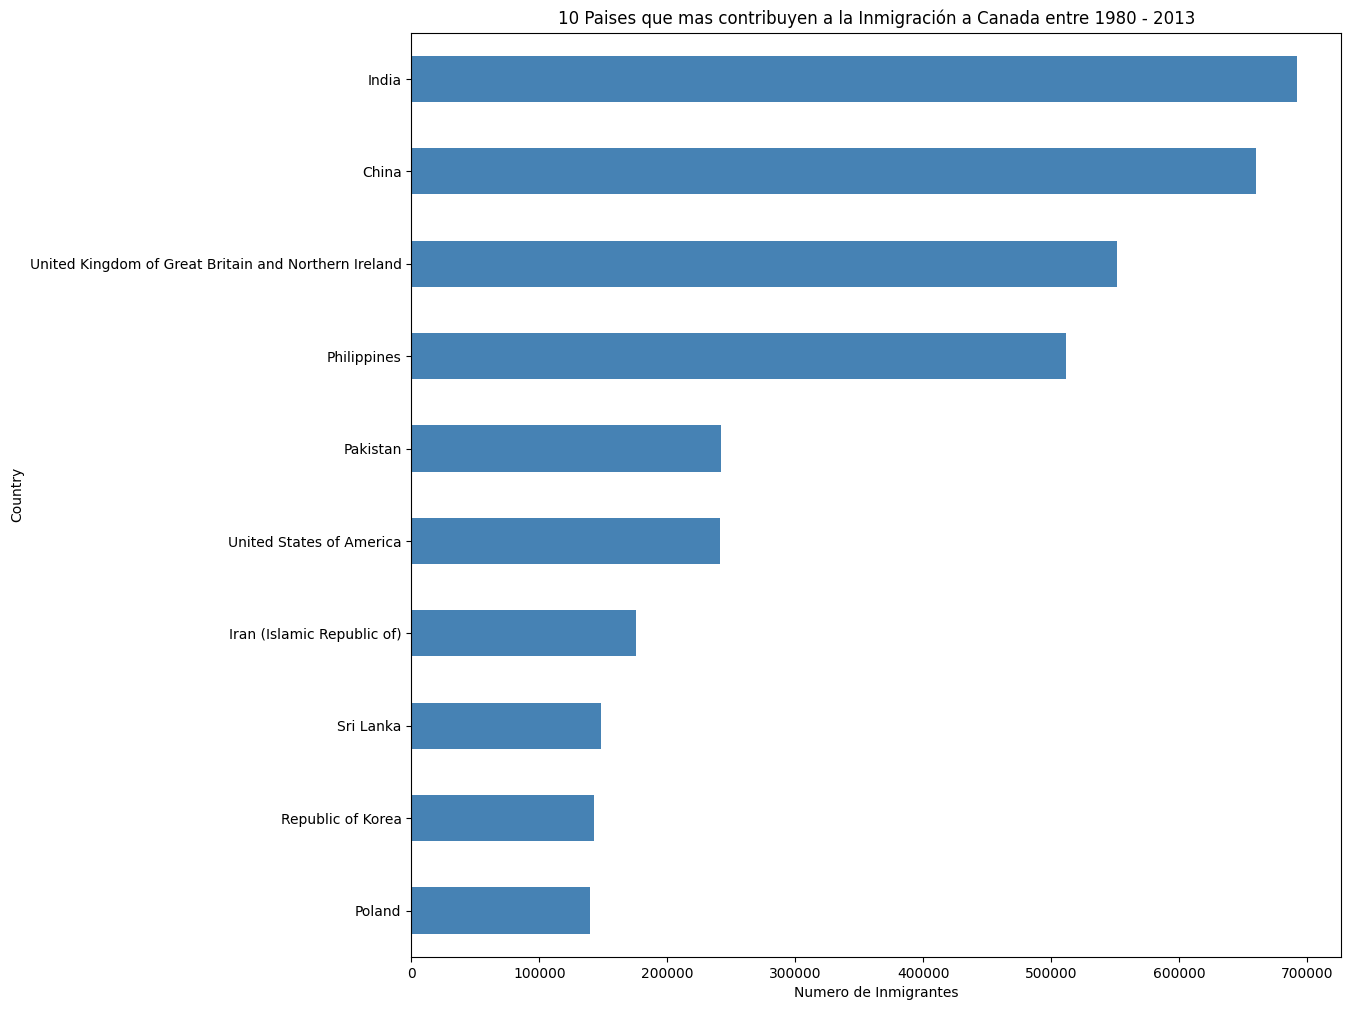

In [90]:
# La misma data anterior, pero ascendente
data_top10.sort_values( ascending=True, # de forma ascendente
                       inplace=True)
data_top10.plot(kind='barh', figsize=(12, 12), color='steelblue', )
plt.xlabel('Numero de Inmigrantes')
plt.title('10 Paises que mas contribuyen a la Inmigración a Canada entre 1980 - 2013')
plt.show()

## Pie Plots

In [91]:
data

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2


In [92]:
# Agrupamos la data por continente (idoneo para graficos circulares)
data_continents = data.groupby('Continent').sum()
data_continents

<ipython-input-92-d47d08d0b65d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_continents = data.groupby('Continent').sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


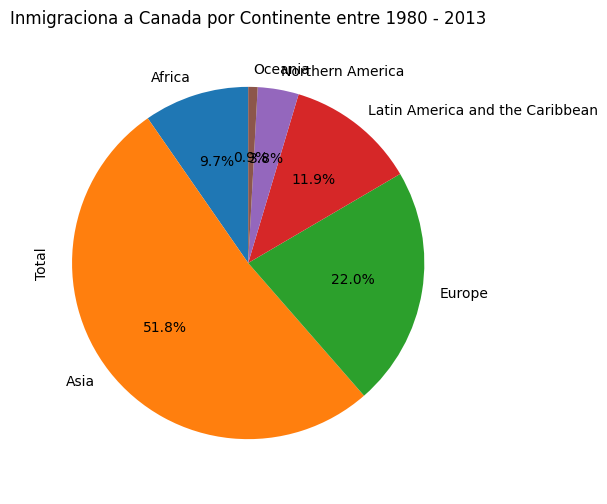

In [93]:
data_continents['Total'].plot(kind='pie', # grafico pie
                              figsize=(5, 6), # tamaño de la figura
                              autopct='%.1f%%', # porcentaje con un decimal
                              startangle=90, # que se muestre el angulo dessde el primer registro: africa
                              shadow=False ) # no agregamos sombra a la figura

plt.title('Inmigraciona a Canada por Continente entre 1980 - 2013')
plt.axis('equal')
plt.show()

## Scatter Plots
- Graficos de variables en funcion de otra

In [94]:
data_insurance = pd.read_csv('https://github.com/luccemhu/Python-introduccion-Qlab/raw/main/S4-Insurance.csv')
data_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16.884.924
1,18,male,33.770,1,no,southeast,17.255.523
2,28,male,33.000,3,no,southeast,4.449.462
3,33,male,22.705,0,no,northwest,2.198.447.061
4,32,male,28.880,0,no,northwest,38.668.552
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,106.005.483
1334,18,female,31.920,0,no,northeast,22.059.808
1335,18,female,36.850,0,no,southeast,16.298.335
1336,21,female,25.800,0,no,southwest,2.007.945


In [95]:
data_insurance.isnull().values.any() # si hay un valor perdido
# No hay

False

In [96]:
data_insurance.info() # informacion de las columnas del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


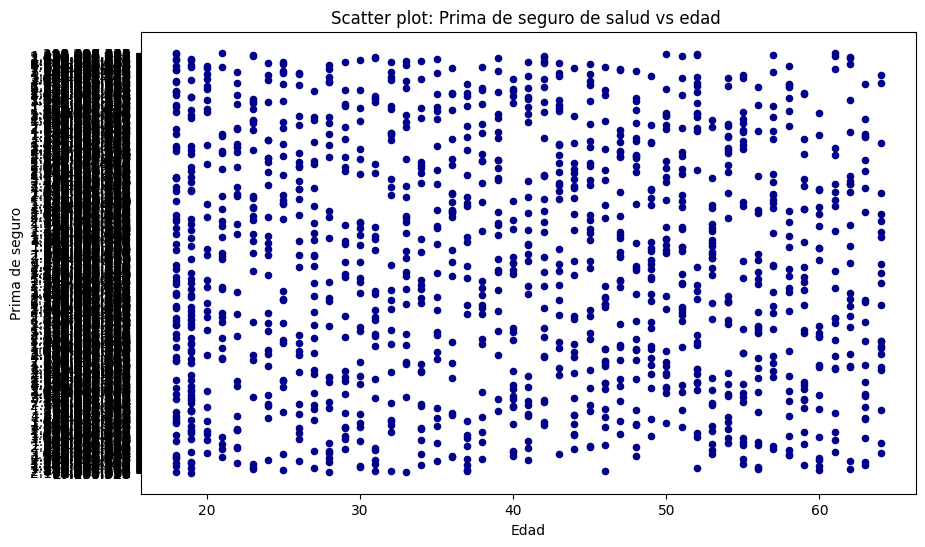

In [97]:
# Creamos un scatter plot
data_insurance.plot(kind='scatter', x='age', y='charges', figsize=(10, 6), color='darkblue')

plt.title('Scatter plot: Prima de seguro de salud vs edad ')
plt.xlabel('Edad')
plt.ylabel('Prima de seguro')
plt.show()

## Histogramas

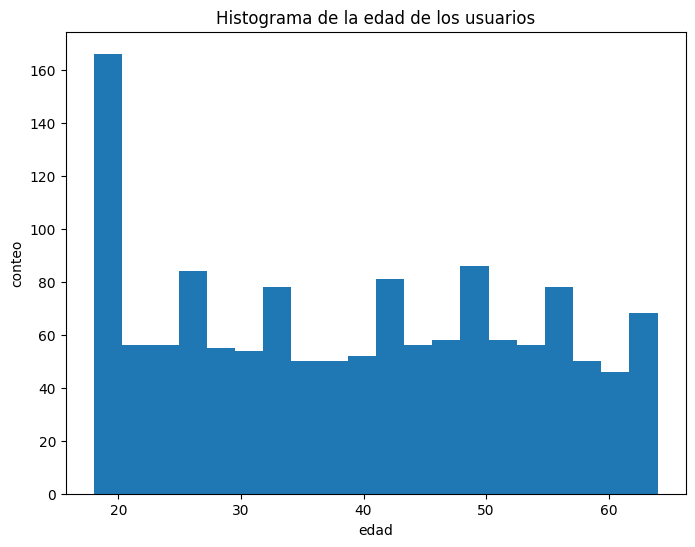

In [98]:

data_insurance['age'].plot(kind='hist', bins=20,
                           figsize=(8, 6))
plt.title('Histograma de la edad de los usuarios')
plt.ylabel('conteo')
plt.xlabel('edad')
plt.show()

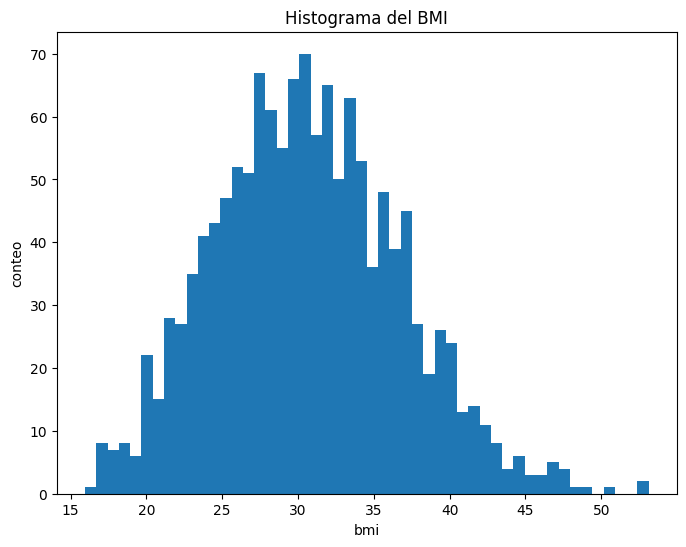

In [99]:
data_insurance['bmi'].plot(kind='hist', bins=50, # Separar las barras
                           figsize=(8, 6))
plt.title('Histograma del BMI')
plt.ylabel('conteo')
plt.xlabel('bmi')
plt.show()

## Plot de Densidad

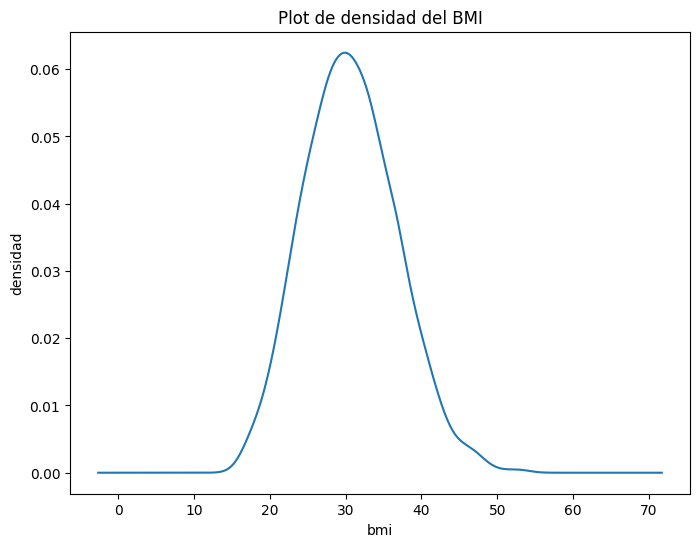

In [100]:
# de una columna en especifico "bmi"
data_insurance['bmi'].plot(kind='density', # tipo de grafico
                           figsize=(8,6))
plt.title('Plot de densidad del BMI')
plt.ylabel('densidad')
plt.xlabel('bmi')
plt.show()

## Plot de Matriz de Correlaciones

In [101]:
filename = 'https://github.com/luccemhu/Python-introduccion-Qlab/raw/main/S4-pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] # Le asignamos nombres a las columnas
data_diabetes = pd.read_csv(filename, names=names)
data_diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
# Correlaciones entre las mismas variables:
correlations = data_diabetes.corr( )
correlations

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.014449,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.001118,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,-0.031976,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.089163,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.105254,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.062700,0.036242,0.292695
pedi,-0.014449,0.001118,-0.031976,0.089163,0.105254,0.062700,1.000000,0.003668,0.071462
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.003668,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.071462,0.238356,1.000000


In [103]:
# Nos muestra el nivel de correlacion entre las variables por colores
correlations.style.background_gradient()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.014449,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.001118,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,-0.031976,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.089163,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.105254,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.062700,0.036242,0.292695
pedi,-0.014449,0.001118,-0.031976,0.089163,0.105254,0.062700,1.000000,0.003668,0.071462
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.003668,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.071462,0.238356,1.000000
